Student name: Annie Dequit

In [6]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import regex as re


# This is my answer to problem no. 1

In [15]:
# manually creating the pandas DataFrame
data = [['1','Young', 'High', 'Fair' , 'No'],['2','Young', 'High', 'Excellent' , 'No'],['3','Medium', 'High', 'Fair' , 'Yes'],['4','Old', 'Medium', 'Fair' , 'Yes'],['5','Old', 'Low', 'Fair' , 'Yes'],['6','Old', 'Low', 'Excellent' , 'No'],['7','Medium', 'Low', 'Excellent' , 'Yes'],['8','Young', 'Medium', 'Fair' , 'No'],['9','Young', 'Low', 'Fair' , 'Yes'],['10','Old', 'Medium', 'Fair' , 'Yes'],['11','Young', 'Medium', 'Excellent' , 'Yes'],['12','Medium', 'Medium', 'Excellent' , 'Yes'],['13','Medium', 'High', 'Fair' , 'Yes'],['14','Old', 'Medium', 'Excellent' , 'No'],['15','Medium', 'Medium', 'Excellent' , 'Yes']]
df5 = pd.DataFrame(data, columns = ['Record ID', 'Age', 'Income', 'CreditRating', 'BuyComputer'])
df5

,Record ID,Age,Income,CreditRating,BuyComputer
0,1,Young,High,Fair,No
1,2,Young,High,Excellent,No
2,3,Medium,High,Fair,Yes
3,4,Old,Medium,Fair,Yes
4,5,Old,Low,Fair,Yes
5,6,Old,Low,Excellent,No
6,7,Medium,Low,Excellent,Yes
7,8,Young,Medium,Fair,No
8,9,Young,Low,Fair,Yes
9,10,Old,Medium,Fair,Yes


In [22]:
print(df5['Age'].unique())
print(df5['CreditRating'].unique())
print(df5['BuyComputer'].unique())
print(df5['Income'].unique())

# df5=df5.unique(Age)

['Young' 'Medium' 'Old']
['Fair' 'Excellent']
['No' 'Yes']
['High' 'Medium' 'Low']


In [8]:
#printing columns and its data type
df5.dtypes

Record ID       object
Age             object
Income          object
CreditRating    object
BuyComputer     object
dtype: object

In [361]:
# in the data 66.6% bought the computer and 33.3% didn't buy
df6 = df5.groupby('BuyComputer').size().div(len(df5)) 
df6

BuyComputer
No     0.333333
Yes    0.666667
dtype: float64

<AxesSubplot:ylabel='BuyComputer'>

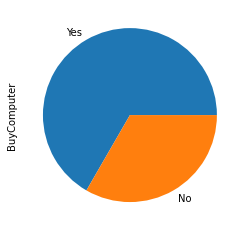

In [392]:
df5.BuyComputer.value_counts().plot(kind='pie')
# in the data 66.6% "Yes" color:blue bought the computer and 33.3% "No" color:orange didn't buy

In [393]:
#generating each of the features of the dataset. 
#probability of finding each feature given possible probability
#dictionary to hold values
prediction = {}
prediction['Age'] = df5.groupby(['BuyComputer', 'Age']).size().div(len(df5)).div(df6)
prediction['Income'] = df5.groupby(['BuyComputer', 'Income']).size().div(len(df5)).div(df6)
prediction['CreditRating'] = df5.groupby(['BuyComputer', 'CreditRating']).size().div(len(df5)).div(df6)

print (prediction)

{'Age': BuyComputer  Age   
No           Old       0.4
             Young     0.6
Yes          Medium    0.5
             Old       0.3
             Young     0.2
dtype: float64, 'Income': BuyComputer  Income
No           High      0.4
             Low       0.2
             Medium    0.4
Yes          High      0.2
             Low       0.3
             Medium    0.5
dtype: float64, 'CreditRating': BuyComputer  CreditRating
No           Excellent       0.6
             Fair            0.4
Yes          Excellent       0.4
             Fair            0.6
dtype: float64}


# Here is the specific probability that the person will buy(Given: It's a Young person with Medium income and Fair credit rating )

In [394]:
# Probability that the person will buy
yesbuy = prediction['Age']['Yes']['Young'] * prediction['Income']['Yes']['Medium'] * \
        prediction['CreditRating']['Yes']['Fair'] * df6['Yes']

# Probability that the person will NOT buy
nobuy = prediction['Age']['No']['Young'] * prediction['Income']['No']['Medium'] * \
       prediction['CreditRating']['No']['Fair'] * df6['No']

yb=int(yesbuy*100)
nb=int(nobuy*100)

print('******************************************************************************************************')
print ('The probability that a Young person with Medium income and Fair credit rating will buy a computer: ',yb,'%')
print ('The probability that a Young person with Medium income and Fair credit rating will NOT buy a computer: ',nb,'%')

******************************************************************************************************
The probability that a Young person with Medium income and Fair credit rating will buy a computer:  4 %
The probability that a Young person with Medium income and Fair credit rating will NOT buy a computer:  3 %


# =================================================================================================

# This is my answer for question 2

# 1.	Getting the system ready and loading the data

In [202]:
loan_application = pd.read_csv (r'C:\Users\a_ade\Documents\Fall2021\CSC276\Dataset.csv')
loan_application.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 2.	Understanding the data

In [113]:
loan_application.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
#the columns and its data types
loan_application.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [115]:
loan_application.shape

(614, 13)

In [116]:
df= pd.DataFrame(loan_application)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 3.	Exploratory Data Analysis 

In [397]:
#only showing columns that might be relevant for determining loan risk, 
#dropping off some columns
df3= df.drop(['Married', 'Gender','Loan_Amount_Term', 'Dependents', 'LoanAmount', 'Property_Area', 'Loan_Status'],axis='columns')
df3

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History
0,LP001002,Graduate,No,5849,0.0,1
1,LP001003,Graduate,No,4583,1508.0,1
2,LP001005,Graduate,Yes,3000,0.0,1
3,LP001006,Not Graduate,No,2583,2358.0,1
4,LP001008,Graduate,No,6000,0.0,1
...,...,...,...,...,...,...
609,LP002978,Graduate,No,2900,0.0,1
610,LP002979,Graduate,No,4106,0.0,1
611,LP002983,Graduate,No,8072,240.0,1
612,LP002984,Graduate,No,7583,0.0,1


# Applicant-income

In [398]:
df3.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [399]:
#minimum recorded income data
x= str(df3.ApplicantIncome.min())
print ("The lowest income in the ApplicantIncome data is : $" +x)

The lowest income in the ApplicantIncome data is : $150


In [400]:
#maximum recorded income data
x= str(df3.ApplicantIncome.max())
print ("The highest income in the ApplicantIncome data is : $" +x)

The highest income in the ApplicantIncome data is : $81000


<AxesSubplot:>

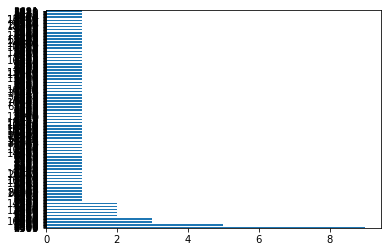

In [401]:
#visualizing the ApplicantIncome income column with barh plot
df3.ApplicantIncome.value_counts().plot(kind='barh')

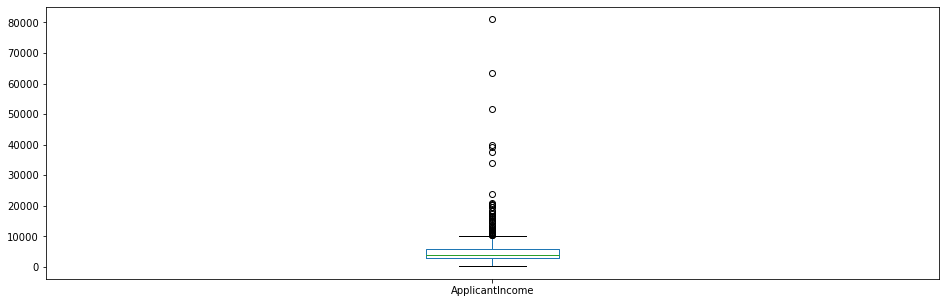

In [402]:
#highest income is $81000
df3['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:ylabel='ApplicantIncome'>

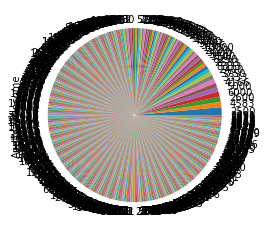

In [403]:
#visualizing the ApplicantIncome income column with pie plot
df3.ApplicantIncome.value_counts().plot(kind='pie')

In [404]:
#you can see here that the income from main Applicant is spread into different values, there are 9 people who has $2500 income
df3.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [405]:
#  1.4% of the ApplicantIncome is = $2500
#  0.9% of the ApplicantIncome is = $4583,$2600,$6000
df3.ApplicantIncome.value_counts(normalize=True)

2500    0.014658
4583    0.009772
2600    0.009772
6000    0.009772
5000    0.008143
          ...   
5818    0.001629
5819    0.001629
5821    0.001629
2750    0.001629
3691    0.001629
Name: ApplicantIncome, Length: 505, dtype: float64

# Co-applicantIncome

In [124]:
z= str(df3.CoapplicantIncome.min())
print ("The lowest income in the Co-applicantIncome is : $" +z)

The lowest income in the Co-applicantIncome is : $0.0


In [125]:
v= str(df3.CoapplicantIncome.max())
print ("The highest income in the Co-applicantIncome is : $" +v)

The highest income in the Co-applicantIncome is : $41667.0


<AxesSubplot:ylabel='CoapplicantIncome'>

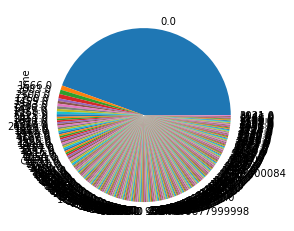

In [131]:
#visualizing the CoapplicantIncome income column
df3.CoapplicantIncome.value_counts().plot(kind='pie')

In [406]:
#you can see here that there are 273 co-applicants who has 0 income , that is 44% 
df3.CoapplicantIncome.value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [133]:
#  44% of the coapplicant has an Income of = 0.0
df3.CoapplicantIncome.value_counts(normalize=True)

0.0       0.444625
1666.0    0.008143
2083.0    0.008143
2500.0    0.008143
1750.0    0.004886
            ...   
7166.0    0.001629
2138.0    0.001629
2166.0    0.001629
3541.0    0.001629
3021.0    0.001629
Name: CoapplicantIncome, Length: 287, dtype: float64

# 4.	Missing value treatment

In [203]:
#checking if what column has a Nan value ,there are 7 columns that has Nan value
loan_application.columns[loan_application.isna().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [224]:
#here i used the loan_application df instead of df3 because df3 doesnt have all the columns
#filling all columns Nan value with relevant value

polishedDF=loan_application.fillna({'LoanAmount':0,'Gender':'Unknown', 'Married': 'Unknown','Dependents': 0,'Self_Employed': 'Unknown','Loan_Amount_Term': 0, 'Credit_History': 0}, inplace=True)
loan_application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [225]:
#checking df if there's still Nan, and you can see it doesnt have any Nan anymore
loan_application.columns[loan_application.isna().any()]

Index([], dtype='object')

# evaluating loan_status with YES or NO in data

In [182]:
#68.7% of applicants have a loan, and 31% have no loan

loan_application['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# evaluating risk

<AxesSubplot:>

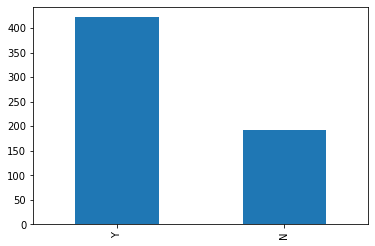

In [161]:
loan_application['Loan_Status'].value_counts().plot.bar()

	Model Building

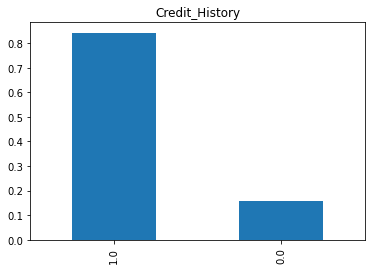

In [54]:
loan_application['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

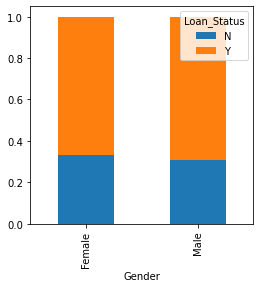

In [62]:
#plotting gender and loan status
Gender=pd.crosstab(loan_application['Gender'],loan_application['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

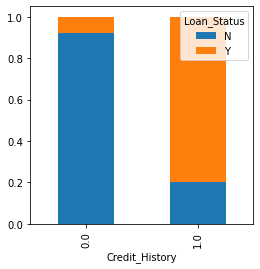

In [162]:
#plotting credit_history , loan_status and property_area from main dataframe loan_application

Credit_History=pd.crosstab(loan_application['Credit_History'],loan_application['Loan_Status'])
Property_Area=pd.crosstab(loan_application['Property_Area'],loan_application['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


<AxesSubplot:xlabel='Loan_Status'>

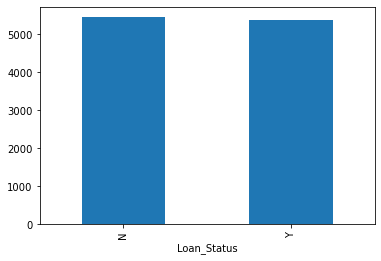

In [66]:
loan_application.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

# A set of records, each one consists of a loan application’s description and its estimated risk level (“low” or “high”)

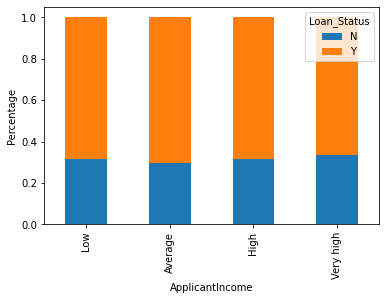

In [71]:
#The measurement of risk for a loan with only the Applicant's Income 

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_application['Income_bin']=pd.cut(loan_application['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_application['Income_bin'],loan_application['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

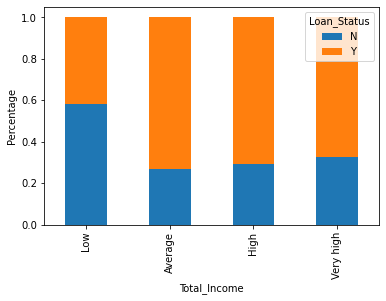

In [73]:
#The measurement of risk for a loan with Applicant's and Co-Applicant's Income is combined
#So the risk is high at 0.6 for people with Low income even with combined income from a co-applicant

loan_application['Total_Income']=loan_application['ApplicantIncome']+loan_application['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_application['Total_Income_bin']=pd.cut(loan_application['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_application['Total_Income_bin'],loan_application['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')